In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 89% 59.0M/66.0M [00:00<00:00, 189MB/s]
100% 66.0M/66.0M [00:00<00:00, 189MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [4]:
def VotingClassification(X_tr,y_tr,X_ts,y_ts):
    #classificateurs de base
    logreg = LogisticRegression(C=0.001,penalty='l2')
    dt = DecisionTreeClassifier(max_depth=5)
    KNN=KNeighborsClassifier(n_neighbors =1)
    #ensemble de vote 
    VC=VotingClassifier(estimators=[('régression logistique', logreg), ('arbre de décision', dt), ('knn', KNN)],voting='hard')
    VC.fit(X_tr,y_tr)
    y_pred = VC.predict(X_ts)
    #performance
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {0:0.5f}'.format(metric(y_ts,y_pred)))
    #matrice de confusion
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 15}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 15)
    plt.xlabel('Prédit',fontsize = 15)
    plt.ylabel('Réel',fontsize = 15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

********** VotingClassification APRES RUS **********
Precision : 0.07659
Recall : 0.88119
F1 : 0.14093
roc_auc_score : 0.93116
metrique personnalisée (MP): 0.90969
\\Matrice de confusion ///:- 
 [[55788  1073]
 [   12    89]]


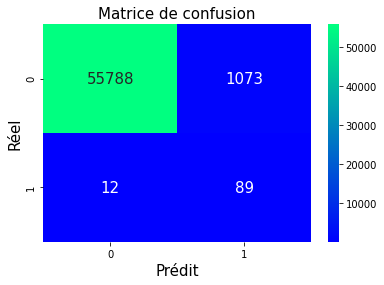

********** VotingClassification APRES ROS **********
Precision : 0.27554
Recall : 0.88119
F1 : 0.41981
roc_auc_score : 0.93854
metrique personnalisée (MP): 0.91390
\\Matrice de confusion ///:- 
 [[56627   234]
 [   12    89]]


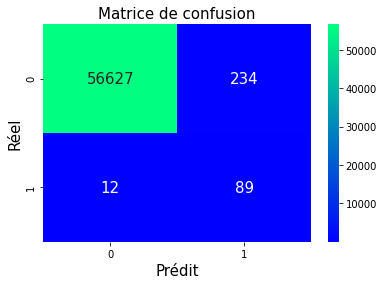

********** VotingClassification APRES SMOTE **********
Precision : 0.13545
Recall : 0.93069
F1 : 0.23648
roc_auc_score : 0.96007
metrique personnalisée (MP): 0.94745
\\Matrice de confusion ///:- 
 [[56261   600]
 [    7    94]]


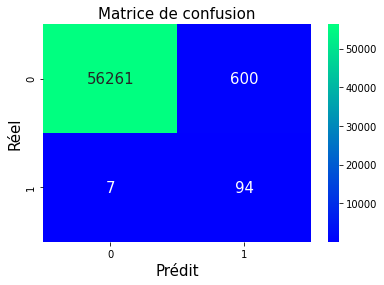

********** VotingClassification APRES ADASYN SMOTE **********
Precision : 0.03438
Recall : 0.94059
F1 : 0.06634
roc_auc_score : 0.94684
metrique personnalisée (MP): 0.94415
\\Matrice de confusion ///:- 
 [[54193  2668]
 [    6    95]]


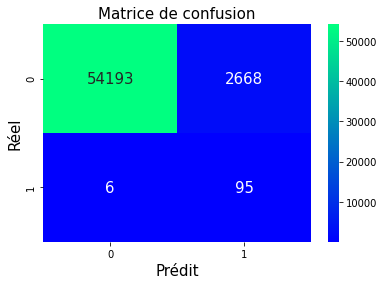

********** VotingClassification APRES BORDERLINE SMOTE **********
Precision : 0.16296
Recall : 0.87129
F1 : 0.27457
roc_auc_score : 0.93167
metrique personnalisée (MP): 0.90573
\\Matrice de confusion ///:- 
 [[56409   452]
 [   13    88]]


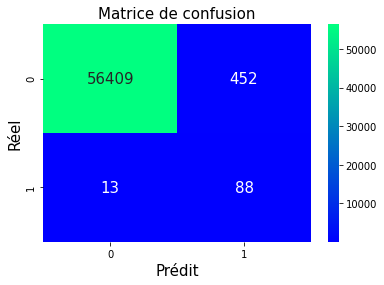

In [5]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_sample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_sample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_sample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_sample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_sample(X_train, Y_train)

print("*"*10,"VotingClassification APRES RUS","*"*10)
VotingClassification(X_train_rus,y_train_rus,X_test,Y_test)
print("*"*10,"VotingClassification APRES ROS","*"*10)
VotingClassification(X_train_ros,y_train_ros,X_test,Y_test)
print("*"*10,"VotingClassification APRES SMOTE","*"*10)
VotingClassification(X_train_smt,y_train_smt,X_test,Y_test)
print("*"*10,"VotingClassification APRES ADASYN SMOTE","*"*10)
VotingClassification(X_train_ada,y_train_ada,X_test,Y_test)
print("*"*10,"VotingClassification APRES BORDERLINE SMOTE","*"*10)
VotingClassification(X_train_Bl,y_train_Bl,X_test,Y_test)